In [ ]:
# Install required packages.
!pip install -q torch-scatter==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.7.0.html
!pip install -q torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.7.0.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git


In [ ]:
%matplotlib inline
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Amazon
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.data import GraphSAINTRandomWalkSampler

In [ ]:
def summarize_data(data, dataset=None):
  if dataset is not None:
    print(f'Dataset: {dataset}:')
    print('======================')
    print(f'Number of graphs: {len(dataset)}')
    print(f'Number of features: {dataset.num_features}')
    print(f'Number of classes: {dataset.num_classes}')
    print()

  print(data)
  print('==============================================================')

  # Gather some statistics about the graph.
  print(f'Number of nodes: {data.num_nodes}')
  print(f'Number of edges: {data.num_edges}')
  print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
  if hasattr(data, 'train_mask'):
    print(f'Number of training nodes: {data.train_mask.sum()}')
    print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
  print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
  print(f'Contains self-loops: {data.contains_self_loops()}')
  print(f'Is undirected: {data.is_undirected()}')



In [ ]:
def visualize_graph(data):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=data.y, cmap="Set2")
    plt.show()

In [ ]:
def plot_data(data):

    edges_raw = data.edge_index.numpy()
    print(edges_raw)
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.y.numpy()

    G = nx.Graph()
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
                'node_size': 30,
                'width': 0.2,
    }
    nx.draw(G, with_labels=False, node_color=labels.tolist(), cmap="Set2", font_weight='bold', **options)
    plt.show()


Dataset: AmazonPhoto():
Number of graphs: 1
Number of features: 745
Number of classes: 8

Data(edge_index=[2, 238162], x=[7650, 745], y=[7650])
Number of nodes: 7650
Number of edges: 238162
Average node degree: 31.13
Contains isolated nodes: True
Contains self-loops: False
Is undirected: True
[[   0    0    0 ... 7649 7649 7649]
 [1210 2198 2239 ... 2239 3295 4196]]


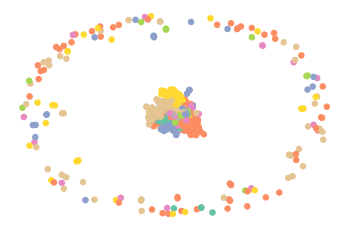

In [ ]:
dataset = Amazon(root='data/Amazon', name='Photo', transform=NormalizeFeatures())
data = dataset[0]
summarize_data(data, dataset)

plot_data(data)

[[   0    0    0 ... 1439 1439 1440]
 [ 223  407  415 ...  415  545  415]]


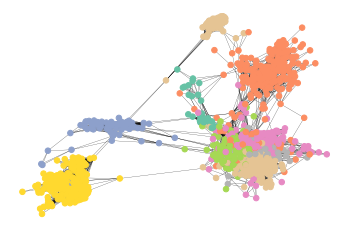

Data(edge_index=[2, 37132], x=[1441, 745], y=[1441])
Number of nodes: 1441
Number of edges: 37132
Average node degree: 25.77
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [ ]:
loader = GraphSAINTRandomWalkSampler(data, batch_size=20, walk_length=100)
subgraph = next(iter(loader))
plot_data(subgraph)
summarize_data(subgraph)


In [ ]:
print(subgraph)
print(data)

Data(edge_index=[2, 37132], x=[1441, 745], y=[1441])
Data(edge_index=[2, 238162], x=[7650, 745], y=[7650])


[[   0    0    0 ... 1542 1542 1542]
 [  13  124  527 ... 1284 1409 1527]]


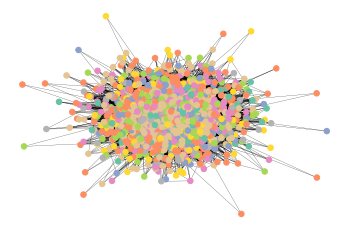

In [ ]:
# Shuffle edges
tmp = data.edge_index.numpy()
rng = np.random.default_rng()
rng.shuffle(tmp[0])
data.edge_index = torch.from_numpy(tmp)

loader = GraphSAINTRandomWalkSampler(data, batch_size=20, walk_length=100)
subgraph = next(iter(loader))
plot_data(subgraph)



In [ ]:
print(subgraph)
print(data)

Data(edge_index=[2, 38895], x=[1514, 745], y=[1514])
Data(edge_index=[2, 238162], x=[7650, 745], y=[7650])
